# <font color='blue'>Data Science</font>
# <font color='blue'>Análise de Dados com Linguagem Python</font>

## <font color='blue'>Suprimentos</font>
## <font color='blue'>Análise de Dados Para Traçar Estratégias Com base em ERP Sienge</font>

In [608]:
# Imports
import math
import sys, os
import numpy as np
import pandas as pd
import watermark 
import pandas as pd
import numpy as np
from sklearn import linear_model
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [609]:
sys.path.append(os.path.abspath(os.path.join('modulos')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

## Carregando os Dados

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [611]:
# Carrega o dataset
df = pd.read_csv("dados/siengeRelatorio.csv", sep=";")


In [612]:
df.shape

(509, 42)

In [613]:
df.head(5)

,Contrato,Empresa,Cód. Obra,Obra,Cód. Fornecedor,Fornecedor*,CPF/CNPJ Fornecedor,Objeto do Contrato,Data do Contrato,Data de Término,...,Cód. Departamento sinal,Departamento sinal,Vencimento do sinal,Observação do sinal,Retém impostos no sinal,Total Fat. Direto,Total Fat. Direto Vinculado,Fat. direto outro(s) contrato(s),Fat. direto considera indice,Fat. direto por desconto
0,CTF/7400121,740 - BLVD ALTI EMPREENDIMENTO IMOBILIÁRIO LTDA,74000.0,PROJETO BLVD ALTI,4130.0,GCS PROMOCAO E PUBLICIDADE LTDA,28.660.162/0001-75,PONTOS DE CAPTAÇÃO - GCS PROMOÇÕES,21/11/2024,01/06/2025,...,NaN,NaN,NaN,NaN,não,NaN,NaN,não,não,não
1,CTF/7400120,740 - BLVD ALTI EMPREENDIMENTO IMOBILIÁRIO LTDA,74000.0,PROJETO BLVD ALTI,2841.0,MAXIMA MARKETING PROMOCIONAL LTDA,18.666.314/0001-93,LOCAÇÃO DE BISTROS - MAXIMA,04/11/2024,04/02/2025,...,NaN,NaN,NaN,NaN,não,NaN,NaN,não,não,não
2,CTF/7400119,740 - BLVD ALTI EMPREENDIMENTO IMOBILIÁRIO LTDA,74000.0,PROJETO BLVD ALTI,2709.0,ALL COPIAS,56.927.924/0001-92,MATERIAIS GRAFICOS - ALL CÓPIAS,26/11/2024,26/04/2025,...,NaN,NaN,NaN,NaN,não,NaN,NaN,não,não,não
3,CTF/7400118,740 - BLVD ALTI EMPREENDIMENTO IMOBILIÁRIO LTDA,74000.0,PROJETO BLVD ALTI,4136.0,PUBLICKER SERVICOS E COMERCIO LTDA,15.479.964/0001-31,MIDIA - PUBLICKER,26/11/2024,26/02/2025,...,NaN,NaN,NaN,NaN,não,NaN,NaN,não,não,não
4,CTF/7400117,740 - BLVD ALTI EMPREENDIMENTO IMOBILIÁRIO LTDA,74000.0,PROJETO BLVD ALTI,4135.0,DUVALE PUBLICIDADE LTDA,56.869.092/0001-03,PUBLICAÇÃO DE ANUNCIO - DUVALE,26/11/2024,26/01/2025,...,NaN,NaN,NaN,NaN,não,NaN,NaN,não,não,não


In [614]:
df.isna().sum()

Contrato                                1
Empresa                                 1
Cód. Obra                               1
Obra                                    1
Cód. Fornecedor                         1
Fornecedor*                             1
CPF/CNPJ Fornecedor                     1
 Objeto do Contrato                     1
Data do Contrato                        1
Data de Término                         1
Situação do Contrato                    1
Data da alteração de situação         215
Descrição da alteração de situação    215
Responsável                             1
Situação de Autorização                 1
Autorizado por                          1
Cód. Tipo do Contrato                   1
Tipo do Contrato                        1
Total Mão de Obra                     118
Total Material                        343
Total                                   6
Total Medido                           35
Saldo                                 289
Cód. Centro custo previsão        

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Contrato                            508 non-null    object 
 1   Empresa                             508 non-null    object 
 2   Cód. Obra                           508 non-null    float64
 3   Obra                                508 non-null    object 
 4   Cód. Fornecedor                     508 non-null    float64
 5   Fornecedor*                         508 non-null    object 
 6   CPF/CNPJ Fornecedor                 508 non-null    object 
 7    Objeto do Contrato                 508 non-null    object 
 8   Data do Contrato                    508 non-null    object 
 9   Data de Término                     508 non-null    object 
 10  Situação do Contrato                508 non-null    object 
 11  Data da alteração de situação       294 non-n

In [616]:
df.columns # See the list of columns after deletion!  

Index(['Contrato', 'Empresa', 'Cód. Obra', 'Obra', 'Cód. Fornecedor',
       'Fornecedor*', 'CPF/CNPJ Fornecedor', ' Objeto do Contrato',
       'Data do Contrato', 'Data de Término', 'Situação do Contrato',
       'Data da alteração de situação', 'Descrição da alteração de situação',
       'Responsável', 'Situação de Autorização', 'Autorizado por',
       'Cód. Tipo do Contrato', 'Tipo do Contrato', 'Total Mão de Obra',
       'Total Material', 'Total', 'Total Medido', 'Saldo',
       'Cód. Centro custo previsão', 'Centro custo previsão',
       'Cód. departamento previsão', 'Departamento previsão',
       'Observação da previsão', 'Total em Aberto', 'Total Sinal',
       'Cód. Centro custo sinal', 'Centro custo sinal',
       'Cód. Departamento sinal', 'Departamento sinal', 'Vencimento do sinal',
       'Observação do sinal', 'Retém impostos no sinal', 'Total Fat. Direto',
       'Total Fat. Direto Vinculado', 'Fat. direto outro(s) contrato(s)',
       'Fat. direto considera indice'

In [617]:
colunas_para_remover = [
    "Cód. Departamento sinal", "Departamento sinal", "Vencimento do sinal",
    "Observação do sinal", "Retém impostos no sinal", "Total Fat. Direto",
    "Total Fat. Direto Vinculado", "Fat. direto outro(s) contrato(s)",
    "Fat. direto considera indice", "Fat. direto por desconto"
]

df = df.drop(columns=colunas_para_remover)


In [618]:
df.head()

,Contrato,Empresa,Cód. Obra,Obra,Cód. Fornecedor,Fornecedor*,CPF/CNPJ Fornecedor,Objeto do Contrato,Data do Contrato,Data de Término,...,Saldo,Cód. Centro custo previsão,Centro custo previsão,Cód. departamento previsão,Departamento previsão,Observação da previsão,Total em Aberto,Total Sinal,Cód. Centro custo sinal,Centro custo sinal
0,CTF/7400121,740 - BLVD ALTI EMPREENDIMENTO IMOBILIÁRIO LTDA,74000.0,PROJETO BLVD ALTI,4130.0,GCS PROMOCAO E PUBLICIDADE LTDA,28.660.162/0001-75,PONTOS DE CAPTAÇÃO - GCS PROMOÇÕES,21/11/2024,01/06/2025,...,NaN,74020.0,INCORPORAÇÃO - BLVD ALTI,6.0,MARKETING,NaN,NaN,NaN,NaN,NaN
1,CTF/7400120,740 - BLVD ALTI EMPREENDIMENTO IMOBILIÁRIO LTDA,74000.0,PROJETO BLVD ALTI,2841.0,MAXIMA MARKETING PROMOCIONAL LTDA,18.666.314/0001-93,LOCAÇÃO DE BISTROS - MAXIMA,04/11/2024,04/02/2025,...,NaN,74020.0,INCORPORAÇÃO - BLVD ALTI,6.0,MARKETING,NaN,NaN,NaN,NaN,NaN
2,CTF/7400119,740 - BLVD ALTI EMPREENDIMENTO IMOBILIÁRIO LTDA,74000.0,PROJETO BLVD ALTI,2709.0,ALL COPIAS,56.927.924/0001-92,MATERIAIS GRAFICOS - ALL CÓPIAS,26/11/2024,26/04/2025,...,"R$ 4.455,00",74020.0,INCORPORAÇÃO - BLVD ALTI,7.0,COMERCIAL,NaN,"R$ 4.455,00",NaN,NaN,NaN
3,CTF/7400118,740 - BLVD ALTI EMPREENDIMENTO IMOBILIÁRIO LTDA,74000.0,PROJETO BLVD ALTI,4136.0,PUBLICKER SERVICOS E COMERCIO LTDA,15.479.964/0001-31,MIDIA - PUBLICKER,26/11/2024,26/02/2025,...,NaN,74020.0,INCORPORAÇÃO - BLVD ALTI,6.0,MARKETING,NaN,NaN,NaN,NaN,NaN
4,CTF/7400117,740 - BLVD ALTI EMPREENDIMENTO IMOBILIÁRIO LTDA,74000.0,PROJETO BLVD ALTI,4135.0,DUVALE PUBLICIDADE LTDA,56.869.092/0001-03,PUBLICAÇÃO DE ANUNCIO - DUVALE,26/11/2024,26/01/2025,...,NaN,74020.0,INCORPORAÇÃO - BLVD ALTI,6.0,MARKETING,NaN,NaN,NaN,NaN,NaN


In [619]:
df.isna().sum()

Contrato                                1
Empresa                                 1
Cód. Obra                               1
Obra                                    1
Cód. Fornecedor                         1
Fornecedor*                             1
CPF/CNPJ Fornecedor                     1
 Objeto do Contrato                     1
Data do Contrato                        1
Data de Término                         1
Situação do Contrato                    1
Data da alteração de situação         215
Descrição da alteração de situação    215
Responsável                             1
Situação de Autorização                 1
Autorizado por                          1
Cód. Tipo do Contrato                   1
Tipo do Contrato                        1
Total Mão de Obra                     118
Total Material                        343
Total                                   6
Total Medido                           35
Saldo                                 289
Cód. Centro custo previsão        

In [620]:
# As colunas dentro do DF estavam com má formatação em virtude disso adotamos os "_" entre os espaçãmentos
df.columns = df.columns.str.replace(" ", "_")


In [621]:
df.columns

Index(['Contrato', 'Empresa', 'Cód._Obra', 'Obra', 'Cód._Fornecedor',
       'Fornecedor*', 'CPF/CNPJ_Fornecedor', '_Objeto_do_Contrato',
       'Data_do_Contrato', 'Data_de_Término', 'Situação_do_Contrato',
       'Data_da_alteração_de_situação', 'Descrição_da_alteração_de_situação',
       'Responsável', 'Situação_de_Autorização', 'Autorizado_por',
       'Cód._Tipo_do_Contrato', 'Tipo_do_Contrato', 'Total_Mão_de_Obra',
       'Total_Material', 'Total', 'Total_Medido', 'Saldo',
       'Cód._Centro_custo_previsão', 'Centro_custo_previsão',
       'Cód._departamento_previsão', 'Departamento_previsão',
       'Observação_da_previsão', 'Total_em_Aberto', 'Total_Sinal',
       'Cód._Centro_custo_sinal', 'Centro_custo_sinal'],
      dtype='object')

#### Como o percentual é maior que 30% poderiamos deletar a coluna porem a mesma pe importante.

## Tratando Coluna "Centro_custo_sinal"

In [624]:
df.Centro_custo_sinal.isnull().sum()

509

In [625]:
df.Centro_custo_sinal.isnull().mean()*100

100.0

#### Encontrado 100% de valor ausente na coluna "Centro_custo_sinal , _Centro_custo_sinal, Total_Sinal, Observação_da_previsão" Por isso a mesma sera dropada

In [627]:
func_calc_percentual_valores_ausentes(df)

O dataset tem 21.82 % de valores ausentes.


In [628]:
func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 32 colunas.
Encontrado: 32 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
Centro_custo_sinal,509,100.00,float64
Cód._Centro_custo_sinal,509,100.00,float64
Total_Sinal,509,100.00,float64
Observação_da_previsão,465,91.36,object
Total_Material,343,67.39,object
Saldo,289,56.78,object
Total_em_Aberto,289,56.78,object
Descrição_da_alteração_de_situação,215,42.24,object
Data_da_alteração_de_situação,215,42.24,object
Total_Mão_de_Obra,118,23.18,object


In [629]:
df = df.drop(columns=['Cód._Centro_custo_sinal','Total_Sinal','Observação_da_previsão'])

Total_Material

In [631]:
df.Total_Material.head(10)

0             NaN
1     R$ 3.849,01
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7    R$ 48.070,00
8     R$ 9.521,13
9             NaN
Name: Total_Material, dtype: object

In [632]:
fix_missing_value(df, 'Total_Material' , 0) # Preechendo valores ausentes com 0

343 valores ausentes na coluna Total_Material foram substituídos por 0.


0                     0
1           R$ 3.849,01
2                     0
3                     0
4                     0
             ...       
504                   0
505                   0
506                   0
507                   0
508    R$ 52.574.077,64
Name: Total_Material, Length: 509, dtype: object

In [633]:
# Remover espaços invisíveis e caracteres especiais como 'R$'
df['Total_Material'] = df['Total_Material'].astype(str).str.replace(r'[^\d,.-]', '', regex=True)

# Substituir ponto (separador de milhar) por nada e vírgula decimal por ponto
df['Total_Material'] = df['Total_Material'].str.replace(r'\.', ',', regex=True).str.replace(',', '.')

# Converter para float e preencher valores ausentes com 0
df['Total_Material'] = pd.to_numeric(df['Total_Material'], errors='coerce').fillna(0)

In [634]:
df.Total_Material.isnull().sum()

0

## Tratando Variavel Centro_custo_sinal

In [636]:
df.Centro_custo_sinal.isnull().sum() # Count values 

509

In [637]:
df.Centro_custo_sinal.isnull().mean()*100

100.0

> ### Pela varivel "Centro_custo_sinal" ter 100% de valores ausentes optamos por deletar a mesma do DF !

In [639]:
df = df.drop(columns=['Centro_custo_sinal'])

### Tratando Variavel "Total_em_Aberto" 

In [641]:
df.Total_em_Aberto.isnull().sum()

289

In [642]:
df.Total_em_Aberto.isnull().mean()*100

56.777996070726914

A variavel "Total_em_Aberto" tem mais que 56% dos valores ausentes em sua construção porem a mesma não pode ser deletada! 

In [644]:
# Definição da função
def formatar_valor_brasileiro(coluna):
    """
    Remove o símbolo 'R$', formata o número no padrão brasileiro
    e converte para float64.
    """
    return (
        coluna.astype(str)  
        .str.replace(r'[^\d,]', '', regex=True)  # Remove tudo que não for número ou vírgula
        .str.replace(',', '.')  # Substitui vírgula decimal por ponto
        .astype(float)  # Converte para float64
    )

# Aplicação no DataFrame (verifique se a coluna está correta!)
df['Total_Material'] = formatar_valor_brasileiro(df['Total_Material'])

In [645]:
df.Total_Material.isnull().sum() # Count values missing

0

In [646]:
df.Total_Material.dtype # Convertido de Str para Float 

dtype('float64')

## Tratando "Variavel Saldo"

In [648]:
df.Saldo.isnull().sum()

289

In [649]:
df.Saldo.dtype

dtype('O')

In [650]:
def limpar_e_converter(coluna):
    """
    Remove símbolos monetários, espaços invisíveis, substitui vírgula por ponto e converte para float.
    Ignora valores vazios.
    """
    return (
        coluna.astype(str)
        .str.replace(r'[^\d,]', '', regex=True)  # Remove tudo que não for número ou vírgula
        .str.replace(',', '.', regex=False)  # Substitui vírgula decimal por ponto
        .replace('', np.nan)  # Substitui strings vazias por NaN
        .astype(float)  # Converte para float
    )

# Aplicação da função na coluna 'Saldo'
df['Saldo'] = limpar_e_converter(df['Saldo'])

In [651]:
fix_missing_value(df, 'Saldo' , 0) # Preechendo valores ausentes com 0

289 valores ausentes na coluna Saldo foram substituídos por 0.


0             0.00
1             0.00
2          4455.00
3             0.00
4             0.00
          ...     
504       10000.00
505           0.00
506           0.00
507           0.00
508    44328514.05
Name: Saldo, Length: 509, dtype: float64

In [652]:
df['Saldo'] = df['Saldo'].map(lambda x: f"{x:,.2f}".replace('.', ','))

In [653]:
df.Saldo.head()

0        0,00
1        0,00
2    4,455,00
3        0,00
4        0,00
Name: Saldo, dtype: object

### Tratando Valores ausentes em Total_em_Aberto

In [655]:
df.Total_em_Aberto.isnull().sum()

289

In [656]:
df.Total_em_Aberto.isnull().mean()*100

56.777996070726914

### A variavel Total_em_Aberto tem mais que 30% de valores ausentes porem a mesma é importate para os dados do cliente! 

In [658]:
def limpar_e_converter(coluna):
    """
    Remove símbolos monetários, espaços invisíveis, substitui vírgula por ponto e converte para float.
    Ignora valores vazios.
    """
    return (
        coluna.astype(str)
        .str.replace(r'[^\d,]', '', regex=True)  # Remove tudo que não for número ou vírgula
        .str.replace(',', '.', regex=False)  # Substitui vírgula decimal por ponto
        .replace('', np.nan)  # Substitui strings vazias por NaN
        .astype(float)  # Converte para float
    )

# Aplicação da função na coluna 'Saldo'
df['Total_em_Aberto'] = limpar_e_converter(df['Total_em_Aberto'])

In [659]:
df['Total_em_Aberto'] = df['Total_em_Aberto'].map(lambda x: f"{x:,.2f}".replace('.', ','))

In [660]:
df.Total_em_Aberto.isnull().sum()

0

## Vtratando Varivel "Descrição_da_alteração_de_situação" 

In [662]:
df.Descrição_da_alteração_de_situação.isnull().sum()

215

In [663]:
df.Descrição_da_alteração_de_situação.dtype

dtype('O')

In [664]:
df.Descrição_da_alteração_de_situação.head(10)

0    Situação alterada através de liberação de medi...
1    Situação alterada através de liberação de medi...
2                                                  NaN
3                                                  NaN
4    Situação alterada através de liberação de medi...
5    Situação alterada através de liberação de medi...
6    Situação alterada através de liberação de medi...
7                                                  NaN
8    Situação alterada através de liberação de medi...
9    Situação alterada através de liberação de medi...
Name: Descrição_da_alteração_de_situação, dtype: object

In [665]:
convert_to_string(df, ['Descrição_da_alteração_de_situação'])

In [666]:
df.Descrição_da_alteração_de_situação.isnull().mean()*100

42.23968565815324

### A variavel Descrição_da_alteração_de_situação conta com mais de 46% de valores ausentes por esse motivo a mesma poderia ser removida porem os dados sao importantes! 

In [668]:
df.Descrição_da_alteração_de_situação.shape

(509,)

In [669]:
df.dropna(subset=['Descrição_da_alteração_de_situação'], inplace=True)


In [670]:
df.Descrição_da_alteração_de_situação.isnull().sum()

0

In [671]:
df.Descrição_da_alteração_de_situação.head()

0    Situação alterada através de liberação de medi...
1    Situação alterada através de liberação de medi...
4    Situação alterada através de liberação de medi...
5    Situação alterada através de liberação de medi...
6    Situação alterada através de liberação de medi...
Name: Descrição_da_alteração_de_situação, dtype: string

### Verificando Variaveis Ausentes do DF

In [673]:
func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 28 colunas.
Encontrado: 7 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
Total_Mão_de_Obra,46,15.65,object
Total_Medido,13,4.42,object
Total,5,1.70,object
Cód._Centro_custo_previsão,5,1.70,float64
Centro_custo_previsão,5,1.70,object
Cód._departamento_previsão,5,1.70,float64
Departamento_previsão,5,1.70,object


### Tratando Variavel *"Total_Mão_de_Obra"* 

In [675]:
df.Total_Mão_de_Obra.isna().sum()

46

In [676]:
df.Total_Mão_de_Obra.shape

(294,)

In [677]:
df.Total_Mão_de_Obra.isnull().mean()*100

15.646258503401361

### Essa variavel de Total_Mão_de_Obra tem 15% de valores ausentes vamos tratar a mesma


In [679]:
df.Total_Mão_de_Obra.head()

0     R$ 31.920,00
1              NaN
4      R$ 8.990,00
5    R$ 333.700,00
6        R$ 705,79
Name: Total_Mão_de_Obra, dtype: object

In [680]:
df.dropna(subset=['Total_Mão_de_Obra'], inplace=True) #deletando linhas com valores ausentes da variavel! 

In [681]:
df.Total_Mão_de_Obra.isna().sum()

0

In [682]:
df['Total_Mão_de_Obra'] = (
    df['Total_Mão_de_Obra']
    .astype(str)  # Garante que os valores são strings antes da substituição
    .str.replace('R$', '', regex=True)  # Remove o símbolo "R$"
    .str.replace('.', '', regex=True)  # Remove os pontos (separadores de milhar)
    .str.replace(',', '.', regex=True)  # Substitui a vírgula decimal por ponto
    .str.strip()  # Remove espaços extras
    .replace('', '0')  # Substitui valores vazios por "0" (ou pode usar NaN)
    .astype(float)  # Converte para float
)

In [683]:
df.Total_Mão_de_Obra.isna().sum()

0

In [684]:
func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 28 colunas.
Encontrado: 1 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
Total_Medido,6,2.42,object


### Tratando Variavel *"Total_Medido"* 

In [686]:
df.Total_Medido.head(5)

0     R$ 31.920,00
4      R$ 8.990,00
5    R$ 333.700,00
6        R$ 705,79
9      R$ 4.500,00
Name: Total_Medido, dtype: object

In [687]:
df.Total_Medido.isnull().sum()


6

In [688]:
df.Total_Medido.isnull().mean()*100

2.4193548387096775

Devido a porcentagem de valores ausentes serem menores que 2% Não iremos remover esses valores ausentes da mesma 



In [690]:
df.Total_Medido.dtype

dtype('O')

In [691]:
df['Total_Medido'] = df['Total_Medido'].fillna(0)


In [692]:
df.Total_Medido.isnull().sum()

0

In [693]:
df['Total_Medido'] = (
    df['Total_Medido']
    .str.replace('R\$', '', regex=True)  
)     # remove "R$"
   


In [694]:
df['Total_Medido'] = (
    df['Total_Medido']
    .astype(str)     )                         # garante que tudo é string


In [695]:
func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 28 colunas.
Encontrado: 0 colunas que têm valores ausentes.


# Todos os valores ausentes tratados! Fim

## Carregamendo do Segundo DF

In [698]:
# Carrega o dataset
df2 = pd.read_csv("dados/siengeRelatorio02.csv", sep=";")

In [699]:
df2.head(5)

,Número do Pedido,Cód. Fornecedor,Fornecedor,Cód. Obra,Obra,Data do Pedido,Comprador,Situação dos Pedidos,Total do Pedido,Total Pendente,Total Entregue,Departamento,Centro Custo,Ações
0,585,3311,ELIZABETE MONTEIRO ALVES,70100,ESPAÇO ARQOS,05/01/2024,LILIANE SILVA,Cancelado,"R$ 3.017,20",NaN,NaN,FACILITIES,ESPAÇO ARQOS,NaN
1,586,3311,ELIZABETE MONTEIRO ALVES,70020,FACILITIES,05/01/2024,LILIANE SILVA,Totalmente entregue,"R$ 1.724,49",NaN,"R$ 1.724,49",FACILITIES,FACILITIES,NaN
2,587,3657,VERONA INDUSTRIA DE PLASTICOS LTDA,70047,PRESIDENCIA,08/01/2024,LILIANE SILVA,Totalmente entregue,"R$ 6.642,66",NaN,"R$ 6.642,66",PRESIDENCIA,PRESIDENCIA,NaN
3,588,2979,"VCH - IMPORTADORA, EXPORTADORA E DISTRIBUICAO ...",70020,FACILITIES,08/01/2024,LILIANE SILVA,Totalmente entregue,"R$ 1.180,90",NaN,"R$ 1.180,90",FACILITIES,FACILITIES,NaN
4,589,3553,SCANSOURCE BRASIL DISTRIBUIDORA DE TECNOLOGIAS...,51010,PROJETO - VISTA ALTA,09/01/2024,TAMARA MENDES,Totalmente entregue,"R$ 6.900,00",NaN,"R$ 6.900,00",BN Engenharia,EXECUÇÃO DE OBRA - BN,NaN


In [700]:
func_calc_percentual_valores_ausentes_coluna(df2)

O dataset tem 14 colunas.
Encontrado: 3 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
Ações,299,100.00,float64
Total Pendente,283,94.65,object
Total Entregue,28,9.36,object


### Tratamento de valores ausentes na coluna "Ações"

In [702]:
df2.Ações.isnull().mean()*100

100.0

## A variavel *Ações* tem 100 % dos seus valores ausentes a mesma sera dropada! 

In [704]:
df2.drop(columns=['Ações'], inplace=True)  # Excluindo Coluna no df2

In [705]:
func_calc_percentual_valores_ausentes_coluna(df2)

O dataset tem 13 colunas.
Encontrado: 2 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
Total Pendente,283,94.65,object
Total Entregue,28,9.36,object


### Tratamento de valores ausentes na coluna "Total Pendente"

In [707]:
df2.columns = df2.columns.str.replace(" ", "_") # removendo todos os espaços e colando _

In [708]:
df2.Total_Pendente.isnull().sum()


283

In [709]:
df2.Total_Pendente.isnull().mean()*100

94.64882943143813

In [710]:
df2.Total_Pendente.head(5)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Total_Pendente, dtype: object

In [711]:
df2.Total_Pendente.dtype

dtype('O')

In [712]:
# substituindo todos os valores Nan POr 0 
df2['Total_Pendente'] = df2['Total_Pendente'].fillna(0)

In [713]:
df2['Total_Pendente'] = (
    df2['Total_Pendente']
    .astype(str)                              # Garante que é string
    .str.replace('\xa0', '', regex=True)      # Remove espaços invisíveis
    .str.replace('R$', '', regex=True)        # Remove "R$"
    .str.replace('.', '', regex=True)         # Remove separador de milhar
    .str.replace(',', '.', regex=True)        # Troca vírgula por ponto
    .str.strip()                              # Remove espaços extras
    .replace('', '0')                         # Troca string vazia por zero
    .astype(float)                            # Converte para float
)


In [714]:
print(df2['Total_Pendente'].dtype)  # Deve retornar: float64


float64


In [715]:
func_calc_percentual_valores_ausentes_coluna(df2)

O dataset tem 13 colunas.
Encontrado: 1 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
Total_Entregue,28,9.36,object


### Tratamento de valores ausentes na coluna "Total Pendente"

In [717]:
df2['Total_Entregue'] = df2['Total_Entregue'].fillna(0)

In [718]:
df2.Total_Entregue.head(5)

0              0
1    R$ 1.724,49
2    R$ 6.642,66
3    R$ 1.180,90
4    R$ 6.900,00
Name: Total_Entregue, dtype: object

In [719]:
df2['Total_Entregue'] = (
    df2['Total_Entregue']
    .astype(str)                              # Garante que é string
    .str.replace('\xa0', '', regex=True)      # Remove espaços invisíveis
    .str.replace('R$', '', regex=True)        # Remove "R$"
    .str.replace('.', '', regex=True)         # Remove separador de milhar
    .str.replace(',', '.', regex=True)        # Troca vírgula por ponto
    .str.strip()                              # Remove espaços extras
    .replace('', '0')                         # Troca string vazia por zero
    .astype(float)                            # Converte para float
)


In [720]:
df2.Total_Entregue.isnull().sum()

0

In [721]:
func_calc_percentual_valores_ausentes_coluna(df2)

O dataset tem 13 colunas.
Encontrado: 0 colunas que têm valores ausentes.


In [722]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Número_do_Pedido      299 non-null    int64  
 1   Cód._Fornecedor       299 non-null    int64  
 2   Fornecedor            299 non-null    object 
 3   Cód._Obra             299 non-null    int64  
 4   Obra                  299 non-null    object 
 5   Data_do_Pedido        299 non-null    object 
 6   Comprador             299 non-null    object 
 7   Situação_dos_Pedidos  299 non-null    object 
 8   Total_do_Pedido       299 non-null    object 
 9   Total_Pendente        299 non-null    float64
 10  Total_Entregue        299 non-null    float64
 11  Departamento          299 non-null    object 
 12  Centro_Custo          299 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 30.5+ KB


In [723]:
def convert_to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')


In [724]:
df2.Data_do_Pedido.info()

<class 'pandas.core.series.Series'>
RangeIndex: 299 entries, 0 to 298
Series name: Data_do_Pedido
Non-Null Count  Dtype 
--------------  ----- 
299 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


In [725]:
df2.Obra.head(5)

0            ESPAÇO ARQOS
1              FACILITIES
2             PRESIDENCIA
3              FACILITIES
4    PROJETO - VISTA ALTA
Name: Obra, dtype: object

In [726]:
df2['Obra'] = df2['Obra'].str.replace(" ", "_") # Removendo espaços dentro da couna obra


## Variavel Centro de Custo

In [728]:
df2.Centro_Custo.head(5)

0             ESPAÇO ARQOS
1               FACILITIES
2              PRESIDENCIA
3               FACILITIES
4    EXECUÇÃO DE OBRA - BN
Name: Centro_Custo, dtype: object

In [729]:
df2['Centro_Custo'] = df2['Centro_Custo'].str.replace(" ", "_") # Removendo espaços dentro da couna obra

In [730]:
df2.Departamento.head(5)

0       FACILITIES
1       FACILITIES
2      PRESIDENCIA
3       FACILITIES
4    BN Engenharia
Name: Departamento, dtype: object

# Análise Estatística Descritiva

In [732]:
# Agrupa os dados por usuário e número do pedido, agregando pelo maior valor
ord_max_count = df2[df2['Obra'] == 'Total_Entregue'].groupby("Departamento")['Total_Entregue'].max().reset_index()
ord_max_count.head()

,Departamento,Total_Entregue


In [733]:
# Remove 'R$', pontos de milhar, substitui vírgula por ponto e converte para float
df2['Total_Entregue'] = (
    df2['Total_Entregue']
    .astype(str)
    .str.replace('R\$', '', regex=True)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

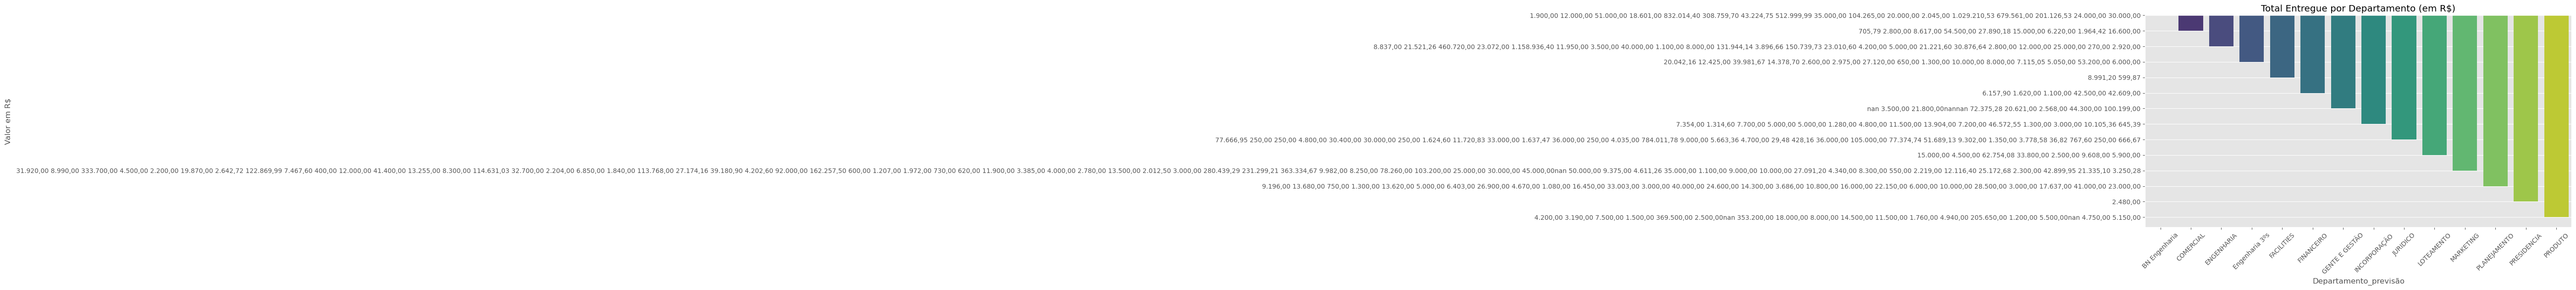

In [751]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupando os valores entregues por departamento
df_grouped = df.groupby('Departamento_previsão')['Total_Medido'].sum().reset_index()

# Plotando
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='Departamento_previsão', y='Total_Medido', palette='viridis')

plt.title('Total Entregue por Departamento (em R$)')
plt.ylabel('Valor em R$')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [745]:
df.Total_Medido.head(50)

0         31.920,00
4          8.990,00
5        333.700,00
6            705,79
9          4.500,00
10         2.200,00
11         7.354,00
15        19.870,00
16         2.642,72
19       122.869,99
20         7.467,60
21         8.837,00
24           400,00
27         4.200,00
28         3.190,00
29        12.000,00
30        41.400,00
31        13.255,00
36         7.500,00
37         2.800,00
38         8.300,00
39        21.521,26
40       114.631,03
41        32.700,00
42         2.204,00
43         6.850,00
44         1.840,00
45       113.768,00
46        27.174,16
48         8.617,00
50       460.720,00
51        54.500,00
52        23.072,00
54        39.180,90
58         4.202,60
62         1.500,00
63     1.158.936,40
66        77.666,95
67         1.314,60
68         7.700,00
69         5.000,00
70       369.500,00
71         2.500,00
72         5.000,00
75        92.000,00
76              nan
77         1.280,00
79       353.200,00
80           250,00
81         9.196,00
